In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers


In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

In [ ]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))


In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [ ]:
def create_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
def create_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
model = create_model()
model.fit(x_train, y_train, epochs=5, batch_size=80, validation_split=0.1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 45s 64ms/step - accuracy: 0.8823 - loss: 0.4025 - val_accuracy: 0.9838 - val_loss: 0.0539
Epoch 2/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 81s 63ms/step - accuracy: 0.9831 - loss: 0.0560 - val_accuracy: 0.9852 - val_loss: 0.0522
Epoch 3/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 81s 63ms/step - accuracy: 0.9884 - loss: 0.0389 - val_accuracy: 0.9878 - val_loss: 0.0427
Epoch 4/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 84s 66ms/step - accuracy: 0.9912 - loss: 0.0276 - val_accuracy: 0.9898 - val_loss: 0.0335
Epoch 5/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 79s 62ms/step - accuracy: 0.9935 - loss: 0.0207 - val_accuracy: 0.9900 - val_loss: 0.0391


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9837 - loss: 0.0471
Test accuracy: 0.9869999885559082


In [ ]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_predictions(x, y_true, y_pred, num_images=2):
    plt.figure(figsize=(5, 5))
    for i in range(num_images):
        plt.subplot(2, 10, i + 1)
        plt.imshow(x[i].reshape(28, 28), cmap='gray')  # Correct parameter name
        plt.title(f'True: {np.argmax(y_true[i])}\nPred: {y_pred[i]}')
        plt.axis('off')
    plt.show()

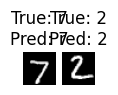

In [ ]:
plot_predictions(x_test, y_test, predicted_classes)